In [20]:
import pandas as pd 

insurance=pd.read_csv("insurance.csv")

insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [21]:
# one hot encoder
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [22]:
X=insurance_one_hot.drop(["charges"],axis=1)
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [23]:
y=insurance_one_hot["charges"]
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_train.shape,y_train.shape,X_test.shape

((1070, 11), (1070,), (268, 11))

In [26]:
import tensorflow as tf
tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[None,32,11]),
    tf.keras.layers.Dense(1),

])

model.compile(loss=tf.keras.losses.mae,metrics=["mae"] ,optimizer=tf.keras.optimizers.SGD())


In [27]:
import numpy as np
import numpy as np

# Assuming X_train and y_train are your input data
X_train = X_train.astype(np.float32)  # Convert to float32 if not already
y_train = y_train.astype(np.float32)  # Convert to float32 if not already

model.fit(X_train,y_train,epochs=100,verbose=0)

In [28]:
# check the results on test data
X_test = X_test.astype(np.float32)  # Convert to float32 if not already
y_test = y_test.astype(np.float32)  
model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8417.6611 - mae: 8417.6611


[8417.6611328125, 8417.6611328125]

In [29]:
import tensorflow as tf
tf.random.set_seed(42)
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=[None,32,11]),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),


])

model_2.compile(loss=tf.keras.losses.mae,metrics=["mae"] ,optimizer=tf.keras.optimizers.Adam())
history=model_2.fit(X_train,y_train,epochs=300,verbose=0)

In [30]:
model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3240.2161 - mae: 3240.2161


[3240.216064453125, 3240.216064453125]

<Axes: >

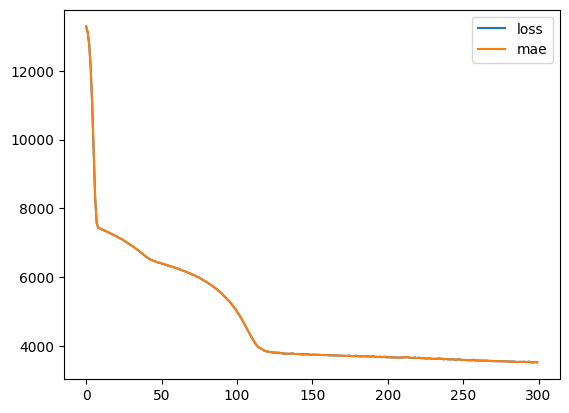

In [31]:
# plot history , training curve

pd.DataFrame(history.history).plot()
# plt.plot(history.history['val_accuracy'])


# Preprocessing Data : Normalization and Standarization 
<img src="/home/raneem/Medical_cost/VS--CourseTensorFlowDeveloperCertificateBootcampUdemy-5’55”.jpg" width=1000 hight=1000>


Nueral networks tend to prefer normaliztion 
if you're not sure on which to use , you could try both and see which performs better  

<Axes: ylabel='Frequency'>

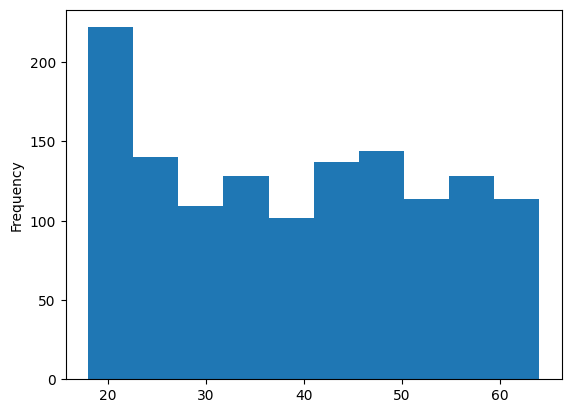

In [32]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

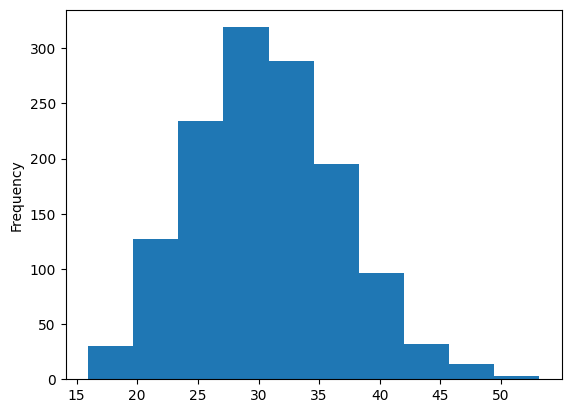

In [33]:
X["bmi"].plot(kind="hist")

In [34]:
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 

insurance =pd.read_csv("insurance.csv")

insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##### the differance between make column transformer and pipeline is that the pipline is a sequence 

<img src="86630Machine Learning Pipeline.png">

In [35]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler ,OneHotEncoder
from sklearn.model_selection import train_test_split

# create a column transformer 

ct=make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),# turn all values in the column to 0-1
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])

)




In [36]:
# Create X,y

X=insurance.drop("charges",axis=1)
y=insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
# fit the column transformer to training data 

ct.fit(X_train)

X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)


In [39]:
# what does our data look like ?

X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [41]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [42]:
X_train_normal.shape,X_train.shape

((1070, 11), (1070, 6))

In [46]:
# let's build nueral network model 
tf.random.set_seed(42)
model_4=tf.keras.Sequential([
tf.keras.layers.Dense(100),
tf.keras.layers.Dense(10),
tf.keras.layers.Dense(1)

])

# compile 

model_4.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(),metrics=["mae"])

# fit the model 
model_4.fit(X_train_normal,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 13344.3994 - mae: 13344.3994
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13337.9570 - mae: 13337.9570
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 13321.5117 - mae: 13321.5117
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 13284.7129 - mae: 13284.7129
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13216.2539 - mae: 13216.2539
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 13104.8447 - mae: 13104.8447
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 12939.7344 - mae: 12939.7344
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 12710.5576 - mae: 12710.5576
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 12406.9678 - mae: 12406.9678
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 12022.20

In [48]:
# evaluate model4

model_4.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3438.5496 - mae: 3438.5496


[3438.549560546875, 3438.549560546875]